In [1]:
from dask import dataframe as dd
import warnings
warnings.filterwarnings('ignore')

# read and concatenate data through dask
df = dd.read_csv('cases/*/*.part')

In [2]:
df.head()

,ddl_case_id,year,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,act,criminal
0,01-01-03-201706000312014,2014,district and sessions court,0,0,1,0,1903,4366,22,17353.0,1
1,01-02-05-201913000292014,2014,civil judge junior division,0,1,0,0,1907,5487,26,4759.0,1
2,01-02-06-203414004572014,2014,civil judge junior division,0,1,1,0,5736,4919,45,17353.0,1
3,01-03-01-203421001102014,2014,criminal cases,0,0,0,0,5736,2821,26,17353.0,1
4,01-03-08-203011000172014,2014,criminal cases,0,0,0,0,5274,2821,25,17353.0,1


In [4]:
df = df.drop('ddl_case_id', axis=1)

In [5]:
df.dtypes

year                   int64
judge_position        object
female_defendant       int64
female_petitioner      int64
female_adv_def         int64
female_adv_pet         int64
type_name              int64
purpose_name           int64
disp_name              int64
act                  float64
criminal               int64
dtype: object

In [17]:
# print to csv single file
df.to_csv('cases/cases_merged.csv', index=False, single_file=True)

['/home/shu7bh/Programming/IIITH/Precog/Task/cases/cases_merged.csv']

In [18]:
import pandas as pd

# read data through pandas
df = pd.read_csv('cases/cases_merged.csv')

In [19]:
# get 'judge_position' column unique values
uni = df['judge_position'].unique()

for i in range(len(uni)):
    df['judge_position'] = df['judge_position'].replace(uni[i], i)

In [20]:
df.head()

,year,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,act,criminal
0,2014,0,0,0,1,0,1903,4366,22,17353,1
1,2014,1,0,1,0,0,1907,5487,26,4759,1
2,2014,1,0,1,1,0,5736,4919,45,17353,1
3,2014,2,0,0,0,0,5736,2821,26,17353,1
4,2014,2,0,0,0,0,5274,2821,25,17353,1


In [22]:
# select the best k features using chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('criminal', axis=1)
y = df['criminal']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  # print 10 best features

               Specs         Score
9                act  7.293730e+07
6          type_name  4.094937e+07
1     judge_position  2.215109e+05
8          disp_name  4.521928e+04
7       purpose_name  2.498491e+04
3  female_petitioner  6.908437e+03
2   female_defendant  5.737696e+03
5     female_adv_pet  3.208959e+03
4     female_adv_def  1.267237e+01
0               year  8.935087e-01


In [23]:
df = df.drop(['year', 'female_adv_def', 'female_adv_pet'], axis=1)

# write to csv
df.to_csv('cases/cases_merged.csv', index=False)

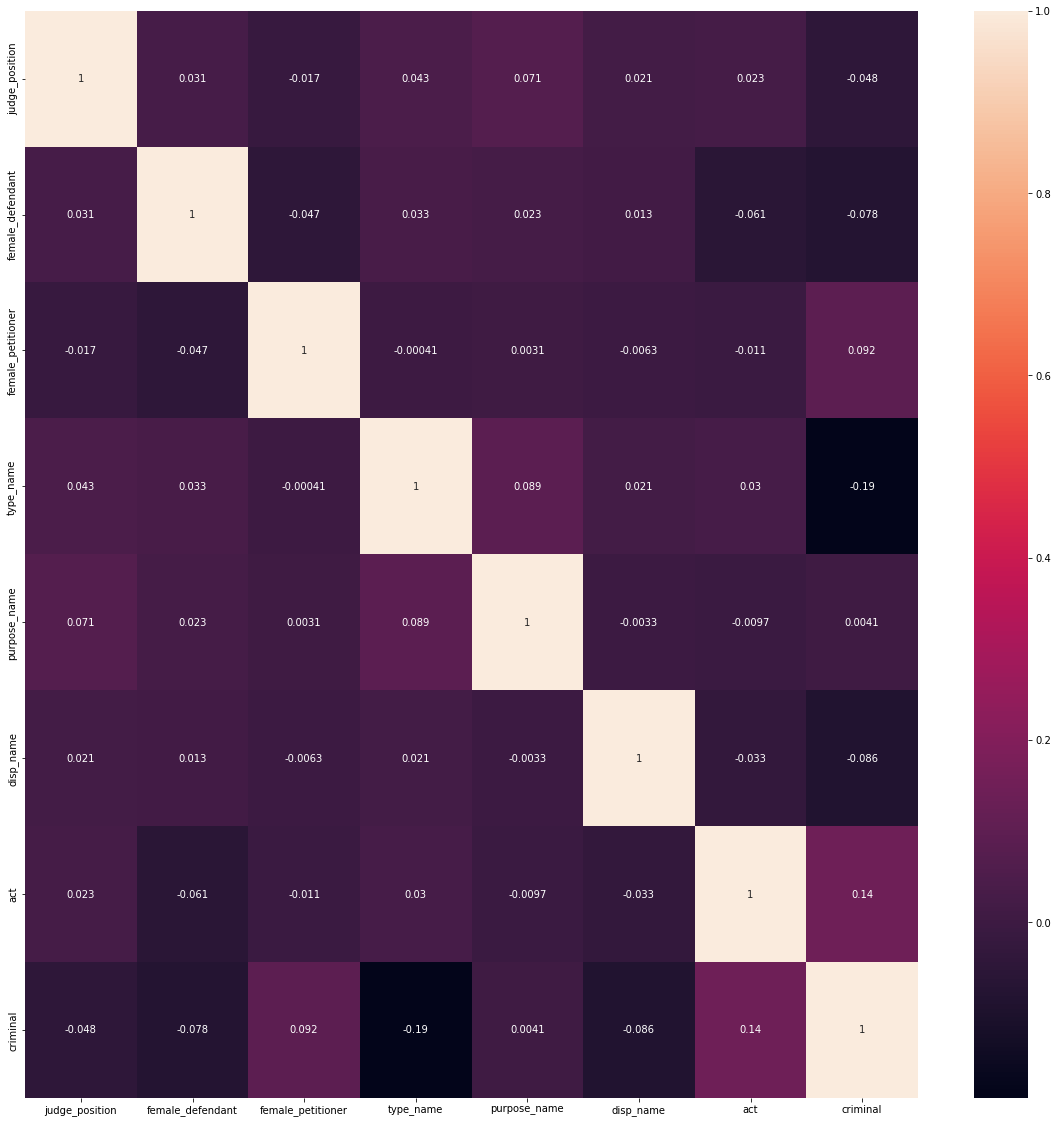

In [25]:
# heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
# plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True)